In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from io import StringIO
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
data = pd.read_csv("C:/Users/charl/Downloads/winequality/winequality-white.csv")

In [19]:
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...

In [20]:
data = pd.read_csv("C:/Users/charl/Downloads/winequality/winequality-white.csv", delimiter=";")

In [21]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [22]:
data.shape

(4898, 12)

In [23]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [24]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
# 결측치 확인
missing_values = data.isnull().sum()

# 결측치 출력
print("결측치 확인:\n", missing_values)

결측치 확인:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


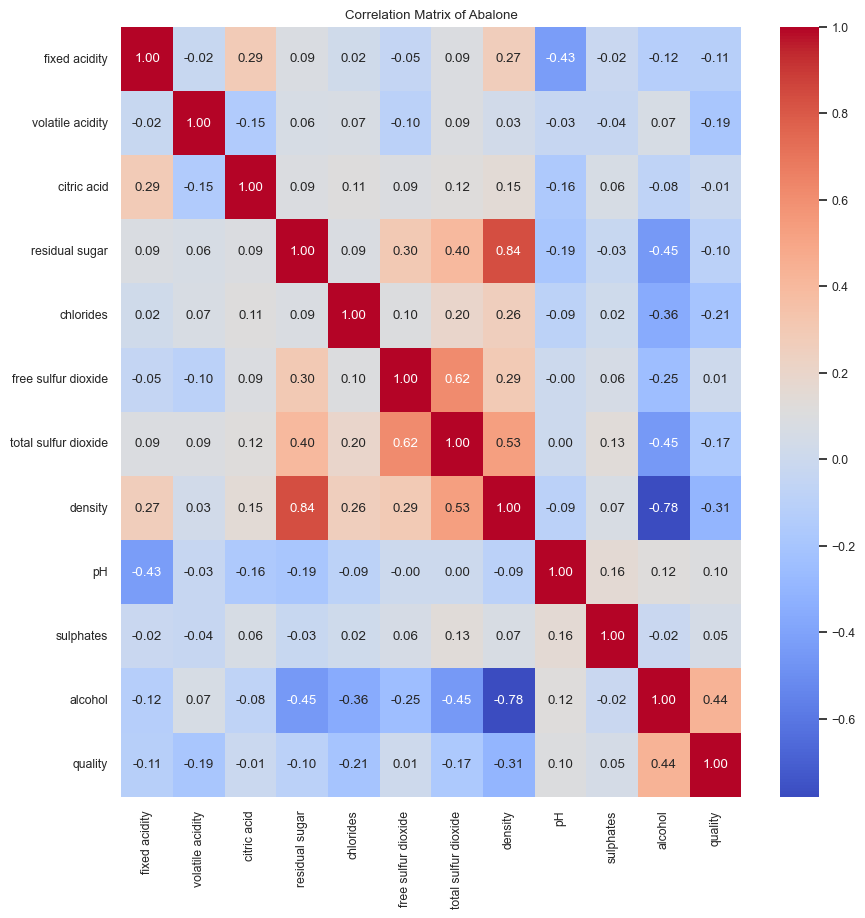

In [69]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

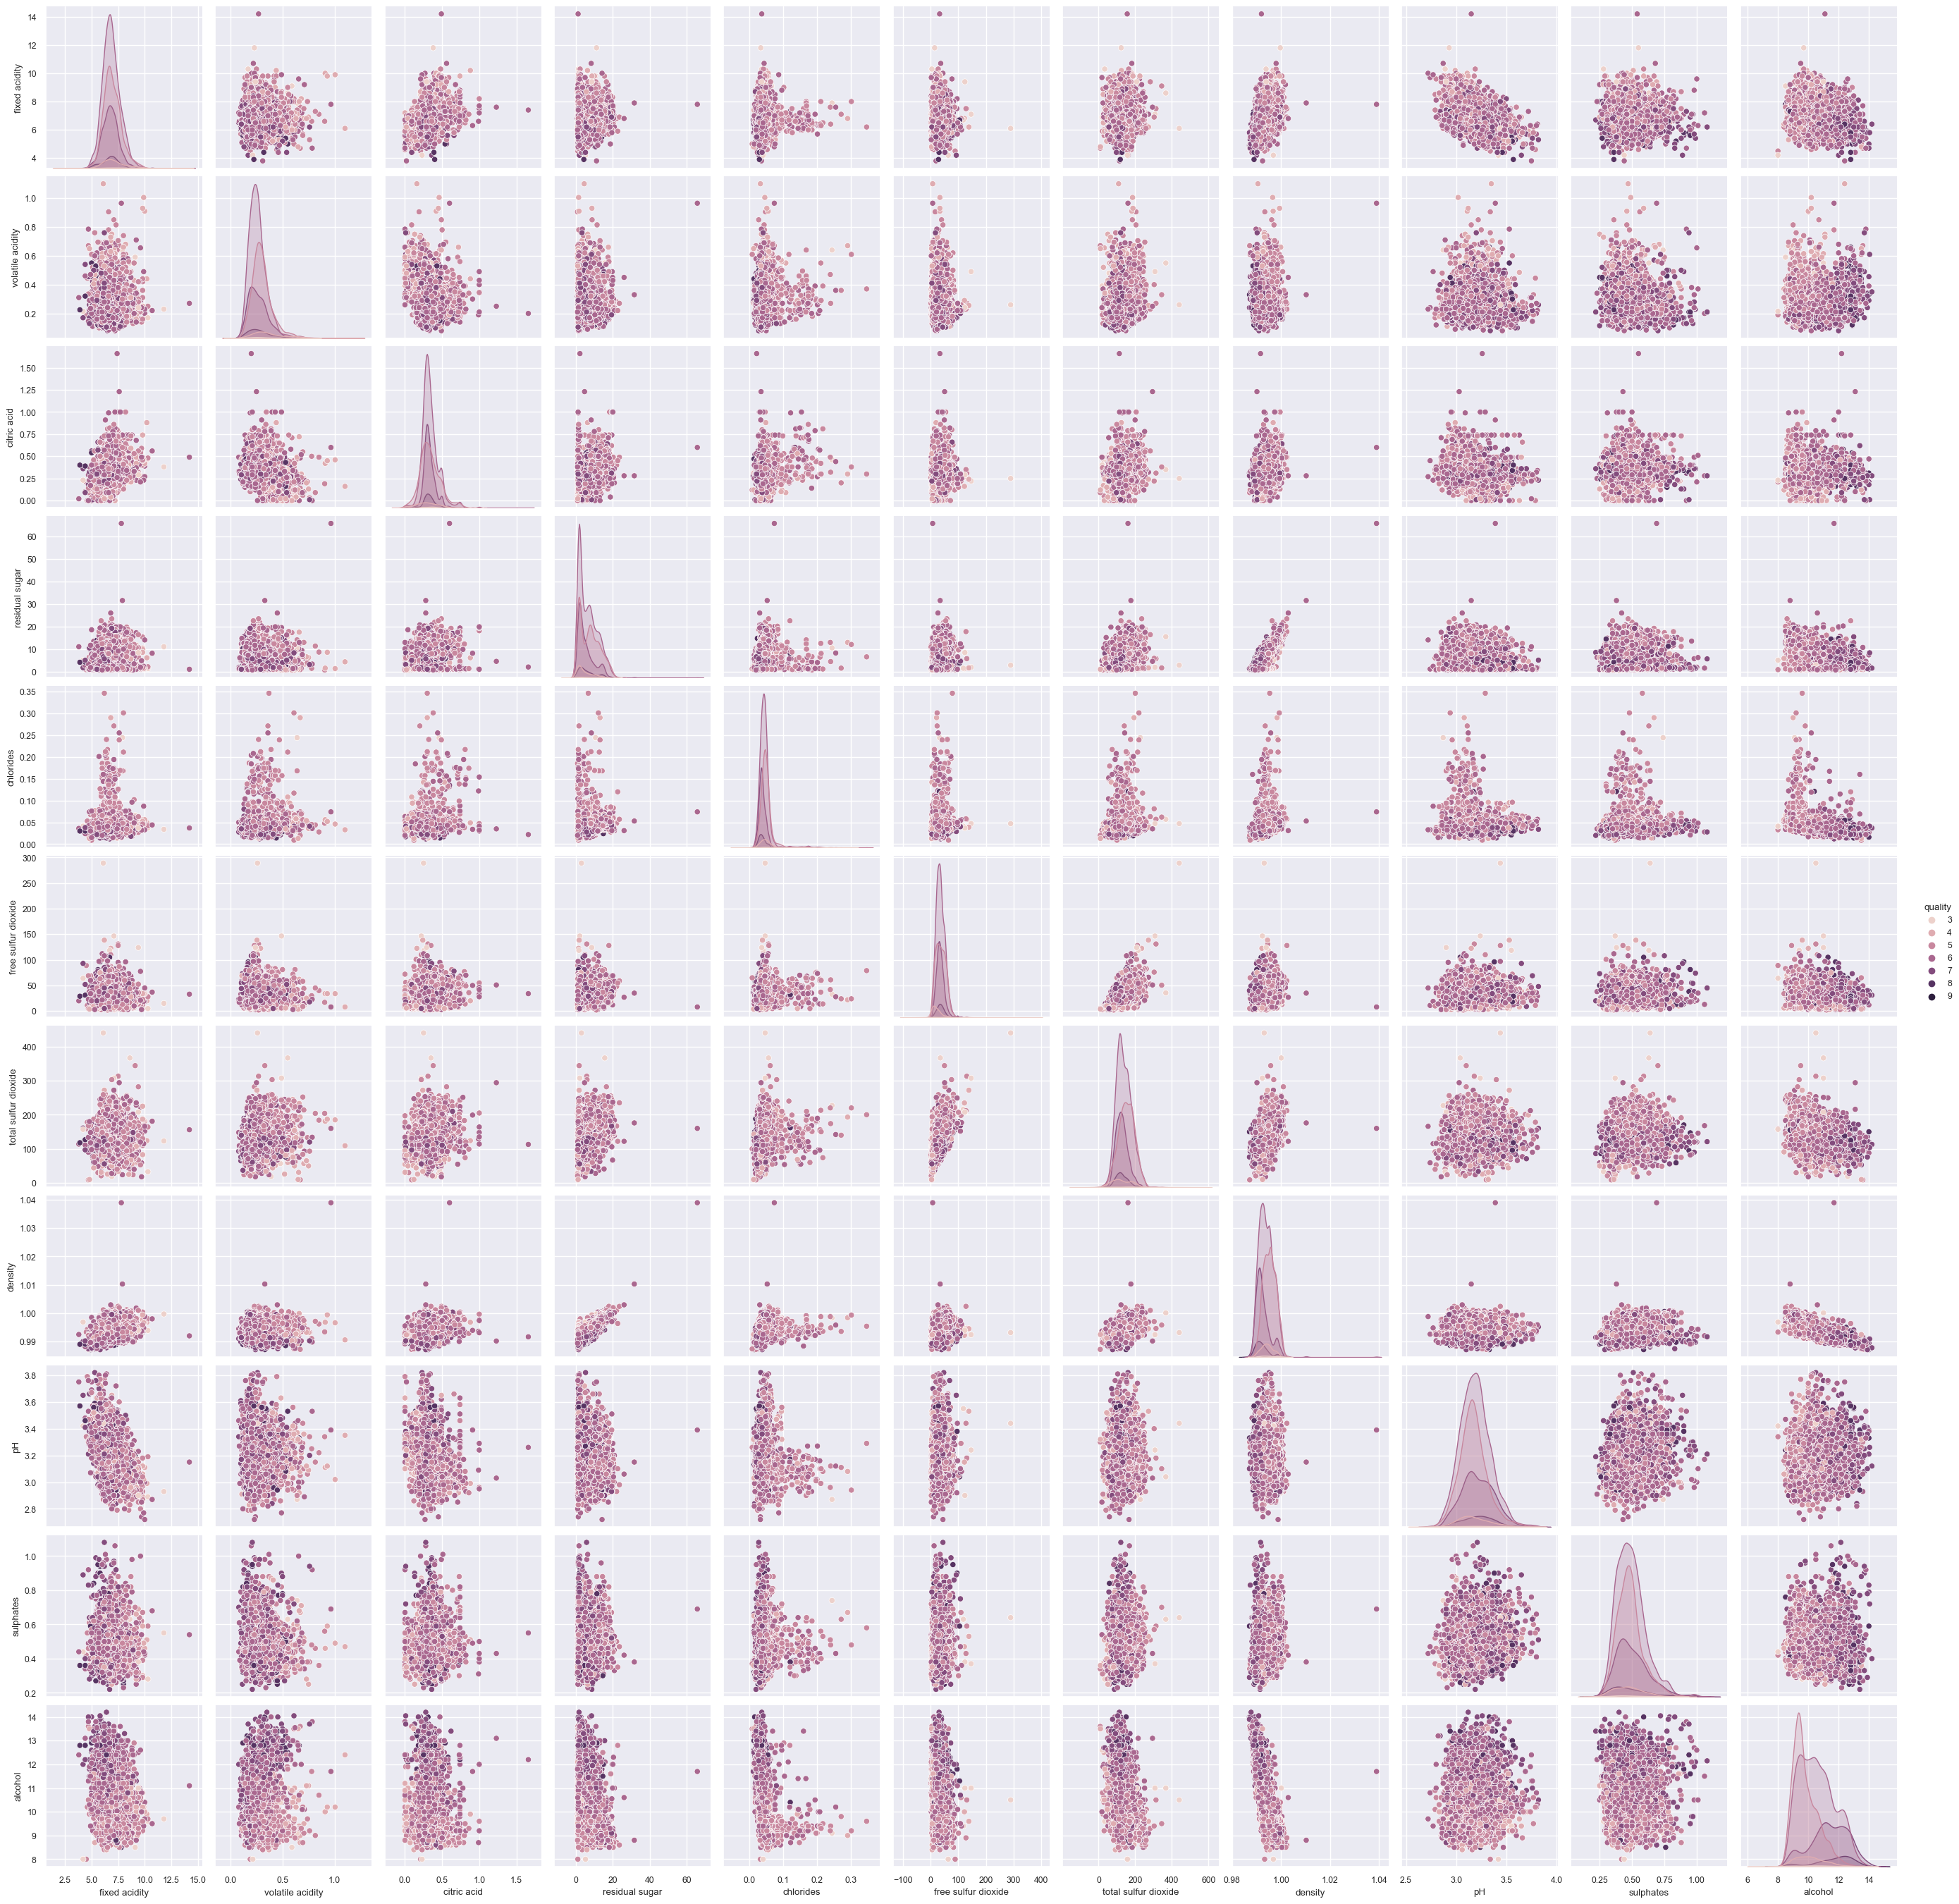

In [70]:
import seaborn as sns

sns.pairplot(data,
             vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
            hue ='quality')
plt.show()

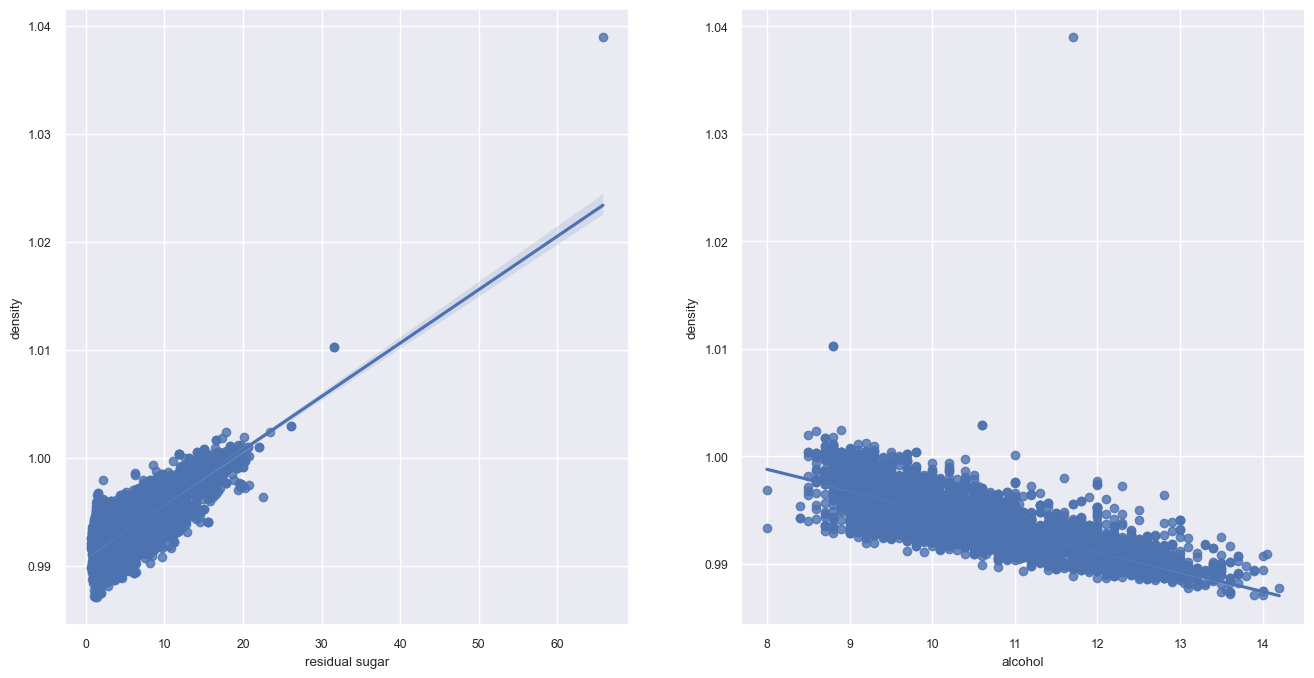

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)

lm_features = ['residual sugar', 'alcohol']

# i에는 인덱스가 feature에가 들어감
for i, feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='density', data=data, ax=axs[col])

plt.show()

In [39]:
data.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [40]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 주어진 데이터에서 'residual sugar', 'alcohol', 'density' 열을 추출
X = data[['residual sugar', 'alcohol', 'density']]
y = data['quality']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# StandardScaler 적용
standard_scaler = StandardScaler()
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)

# 수정된 코드에서는 X_train과 X_test가 스케일링된 데이터로 대체됨
x_train, x_test, y_train, y_test = train_test_split(X_train_standard_scaled, y_train, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2754, 3), (919, 3), (2754,), (919,))

In [101]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.4972796517954298
[[  0   0   1   2   0   0   0]
 [  0   0   7  18   0   0   0]
 [  0   0 118 143   0   0   0]
 [  0   0  83 325  14   0   0]
 [  0   0  11 141  14   0   0]
 [  0   0   3  34   4   0   0]
 [  0   0   0   1   0   0   0]]


In [102]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.499455930359086
[[  0   0   1   2   0   0   0]
 [  0   0  11  14   0   0   0]
 [  0   0 123 136   2   0   0]
 [  0   0  88 308  26   0   0]
 [  0   0  18 120  28   0   0]
 [  0   0   6  23  12   0   0]
 [  0   0   0   0   1   0   0]]


In [103]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5418933623503809
[[  0   0   0   1   2   0   0]
 [  0   2  10  11   1   1   0]
 [  0   2 146  94  17   2   0]
 [  2   7  93 253  53  13   1]
 [  0   5  10  58  81  12   0]
 [  0   1   6   9   9  16   0]
 [  0   0   1   0   0   0   0]]


In [104]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.5941240478781284
[[  0   0   1   2   0   0   0]
 [  0   2  11  12   0   0   0]
 [  0   1 158  93   8   1   0]
 [  0   3  85 292  39   3   0]
 [  0   1  10  69  83   3   0]
 [  0   0   4  19   7  11   0]
 [  0   0   0   1   0   0   0]]


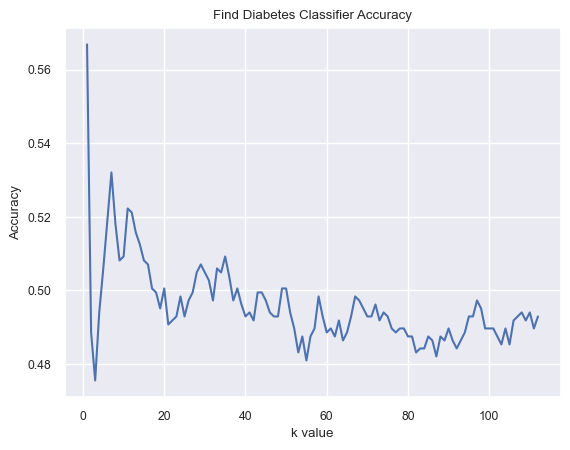

In [105]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 주어진 데이터에서 'residual sugar', 'alcohol', 'density' 열을 추출
X = data[['residual sugar', 'alcohol', 'density']]
y = data['quality']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# MinMaxScaler 적용
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)
# 수정된 코드에서는 X_train과 X_test가 스케일링된 데이터로 대체됨
x_train, x_test, y_train, y_test = train_test_split(X_train_standard_scaled, y_train, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2754, 3), (919, 3), (2754,), (919,))

In [107]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.4972796517954298
[[  0   0   1   2   0   0   0]
 [  0   0   7  18   0   0   0]
 [  0   0 118 143   0   0   0]
 [  0   0  83 325  14   0   0]
 [  0   0  11 141  14   0   0]
 [  0   0   3  34   4   0   0]
 [  0   0   0   1   0   0   0]]


In [108]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.499455930359086
[[  0   0   1   2   0   0   0]
 [  0   0  11  14   0   0   0]
 [  0   0 123 136   2   0   0]
 [  0   0  88 308  26   0   0]
 [  0   0  18 120  28   0   0]
 [  0   0   6  23  12   0   0]
 [  0   0   0   0   1   0   0]]


In [109]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5418933623503809
[[  0   0   0   1   2   0   0]
 [  0   2  10  11   1   1   0]
 [  0   2 146  94  17   2   0]
 [  2   7  93 253  53  13   1]
 [  0   5  10  58  81  12   0]
 [  0   1   6   9   9  16   0]
 [  0   0   1   0   0   0   0]]


In [110]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.5941240478781284
[[  0   0   1   2   0   0   0]
 [  0   2  11  12   0   0   0]
 [  0   1 158  93   8   1   0]
 [  0   3  85 292  39   3   0]
 [  0   1  10  69  83   3   0]
 [  0   0   4  19   7  11   0]
 [  0   0   0   1   0   0   0]]


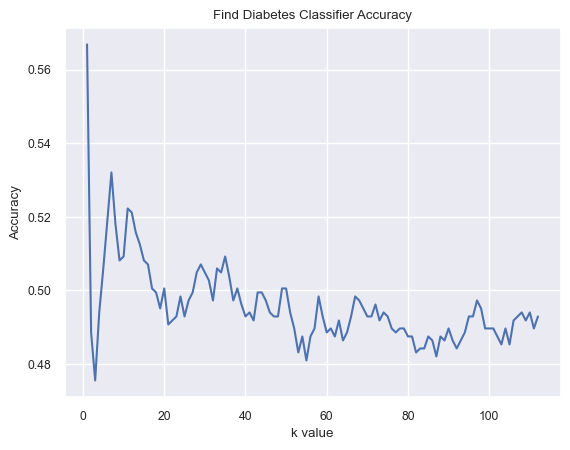

In [111]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 주어진 데이터에서 'residual sugar', 'alcohol', 'density' 열을 추출
X = data[['residual sugar', 'alcohol', 'density']]
y = data['quality']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# RobustScaler 적용
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

# 수정된 코드에서는 X_train과 X_test가 스케일링된 데이터로 대체됨
x_train, x_test, y_train, y_test = train_test_split(X_train_standard_scaled, y_train, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2754, 3), (919, 3), (2754,), (919,))

In [113]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.4972796517954298
[[  0   0   1   2   0   0   0]
 [  0   0   7  18   0   0   0]
 [  0   0 118 143   0   0   0]
 [  0   0  83 325  14   0   0]
 [  0   0  11 141  14   0   0]
 [  0   0   3  34   4   0   0]
 [  0   0   0   1   0   0   0]]


In [114]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.499455930359086
[[  0   0   1   2   0   0   0]
 [  0   0  11  14   0   0   0]
 [  0   0 123 136   2   0   0]
 [  0   0  88 308  26   0   0]
 [  0   0  18 120  28   0   0]
 [  0   0   6  23  12   0   0]
 [  0   0   0   0   1   0   0]]


In [115]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5418933623503809
[[  0   0   0   1   2   0   0]
 [  0   2  10  11   1   1   0]
 [  0   2 146  94  17   2   0]
 [  2   7  93 253  53  13   1]
 [  0   5  10  58  81  12   0]
 [  0   1   6   9   9  16   0]
 [  0   0   1   0   0   0   0]]


In [116]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.5941240478781284
[[  0   0   1   2   0   0   0]
 [  0   2  11  12   0   0   0]
 [  0   1 158  93   8   1   0]
 [  0   3  85 292  39   3   0]
 [  0   1  10  69  83   3   0]
 [  0   0   4  19   7  11   0]
 [  0   0   0   1   0   0   0]]


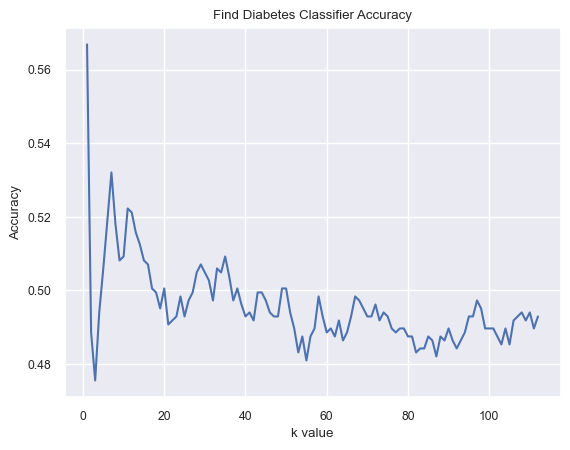

In [117]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Diabetes Classifier Accuracy")
plt.show()